In [230]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

## Product Dataset

The product file products_info.csv includes information about the characteristics of the top 372 products with most users in 2020. The categories listed in this file are part of LearnPlatform's product taxonomy. Data were labeled by our team. Some products may not have labels due to being duplicate, lack of accurate url or other reasons.

---
LP ID: 
The unique identifier of the product

---

URL	Web: Link to the specific product

---
Product Name:	Name of the specific product

---
Provider/Company Name:	Name of the product provider

---
Sector(s):	Sector of education where the product is used

---
Primary Essential Function:	The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled


There are 372 unique products provided by LearnPlatform. These products are used and tracked on a daily basis. There are a total of 22 million products accessed in the year 2020.
In this exploration section we will see how the products are being used, who are the top companies providing these products and what products are the most being used.  

In [3]:
pd_df = pd.read_csv('products_info.csv')

In [4]:
pd_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [5]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [6]:
pd_df.nunique()

LP ID                         372
URL                           372
Product Name                  372
Provider/Company Name         290
Sector(s)                       5
Primary Essential Function     35
dtype: int64

In [7]:
# Renaming product dataset
pd_df.columns = ['LP ID', 'url', 'name', 'provider', 'sector',
       'function']
pd_df.columns

Index(['LP ID', 'url', 'name', 'provider', 'sector', 'function'], dtype='object')

## District Information Dataset

The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. In this data set, we removed the identifiable information about the school districts. We also used an open source tool ARX (Prasser et al. 2020) to transform several data fields and reduce the risks of re-identification. For data generalization purposes some data points are released with a range where the actual value falls under. Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset.

---
district_id:

The unique identifier of the school district

---
state:

The state where the district resides in

---
locale:

NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. 
See Locale Boundaries User's Manual for more information.

---
pct_black/hispanic:

Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data

---
pct_free/reduced:

Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data

---
countyconnectionsratio:

ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) 
based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.

---
pptotalraw:

Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource 
Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

There are a total of 233 districts and 23 states available in the dataset. Below is a quick overview of the dataset.

In [10]:
dist_df = pd.read_csv('districts_info.csv')

In [11]:
dist_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [13]:
dist_df['state'].nunique()

23

## Engagement Data

The engagement data are aggregated at school district level, and each file in the folder engagement_data represents data from one school district. The 4-digit file name represents district_id which can be used to link to district information in district_info.csv. The lp_id can be used to link to product information in product_info.csv.

---
time:

date in "YYYY-MM-DD"


---
lp_id:

The unique identifier of the product

---
pct_access: 

Percentage of students in the district have at least one page-load event of a given product and on a given day

---
engagement_index:

Total page-load events per one thousand students of a given product and on a given day


The engagement dataset has around 22M rows and 5 features.
Below is a quick overview of the dataset.

In [14]:
e_files = []
for dirname, _, filenames in os.walk('engagement_data/'):
    for filename in filenames:
        e_files.append([os.path.join(dirname, filename),filename[0:4]])

In [15]:
e_all = pd.DataFrame()
for file in e_files:
    e_df = pd.read_csv(file[0])
    e_df['id'] = file[1]
    e_all = e_all.append(e_df)   

In [16]:
e_all.shape

(22324190, 5)

In [17]:
e_all.head()

,time,lp_id,pct_access,engagement_index,id
0,2020-01-01,93690.0,0.00,NaN,1000
1,2020-01-01,17941.0,0.03,0.90,1000
2,2020-01-01,65358.0,0.03,1.20,1000
3,2020-01-01,98265.0,0.57,37.79,1000
4,2020-01-01,59257.0,0.00,NaN,1000


In [18]:
e_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22324190 entries, 0 to 98449
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   id                object 
dtypes: float64(3), object(2)
memory usage: 1021.9+ MB


In [19]:
e_all.isna().sum() *100 / len(e_all)

time                 0.000000
lp_id                0.002423
pct_access           0.060235
engagement_index    24.092292
id                   0.000000
dtype: float64

In [21]:
pd.to_datetime(e_all['time'], dayfirst = True)

0       2020-01-01
1       2020-01-01
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
98445   2020-12-31
98446   2020-12-31
98447   2020-12-31
98448   2020-12-31
98449   2020-12-31
Name: time, Length: 22324190, dtype: datetime64[ns]

In [22]:
# Splitting time column
e_all_copy = e_all.copy()
e_all[['year', 'month', 'day']] = e_all['time'].str.split("-", expand=True)

In [23]:
# Forming new variables week and weekday

e_all['cw'] = pd.DatetimeIndex(e_all['time']).week
e_all['weekday'] = pd.DatetimeIndex(e_all['time']).weekday

## Data Pre-processing

As the data is raw and contains a lot of messy column values, it needs some pre-processing before we can use the data for further analysis. First let's consider the missing values and then do some pre-processing steps.

## Missing Values

Product Dataset
This dataset contain missing value of 41 which mainly come from Sectors(s), Primary Essential Function with each of them has 20 missing values and 1 missing value on Provider/Company Name. We can also view the percentage of missiing values in the column below

In [25]:
pd_df.isnull().sum()

LP ID        0
url          0
name         0
provider     1
sector      20
function    20
dtype: int64

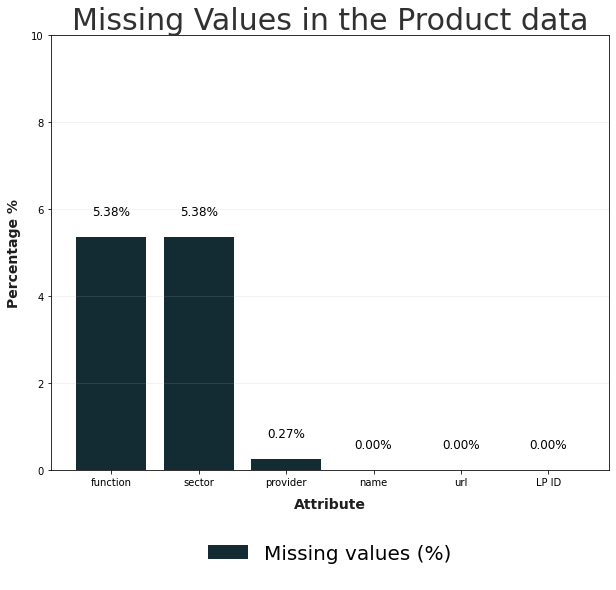

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
null_values = (pd_df.isnull().sum() / len(pd_df) * 100).sort_values(ascending=False)
bars = ax.bar(x=null_values.index, height=null_values.values, color=colors_blue[0])

for bar in bars: 
    height = bar.get_height()
    x = bar.get_x()
    
    ax.text(
        x=x+0.4, y=height + 0.5,
        ha='center',
        s="{:.2f}%".format(height),
        fontsize=12,
        color='black',
    )

ax.set_xlabel("Attribute", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Percentage %", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.grid(axis='y', alpha=0.2)

ax.legend(["Missing values (%)"], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=20)
plt.title("Missing Values in the Product data",
          loc='center', fontsize=30, color=colors_dark[1])
plt.ylim(ymax=10)

plt.show()

### District Dataset

As you can see except the district_id column all the other rows contain missing values. But since this notebook does not consist of any machine learning modelling, author decided to not process those missing values.

In [27]:
dist_df.isnull().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

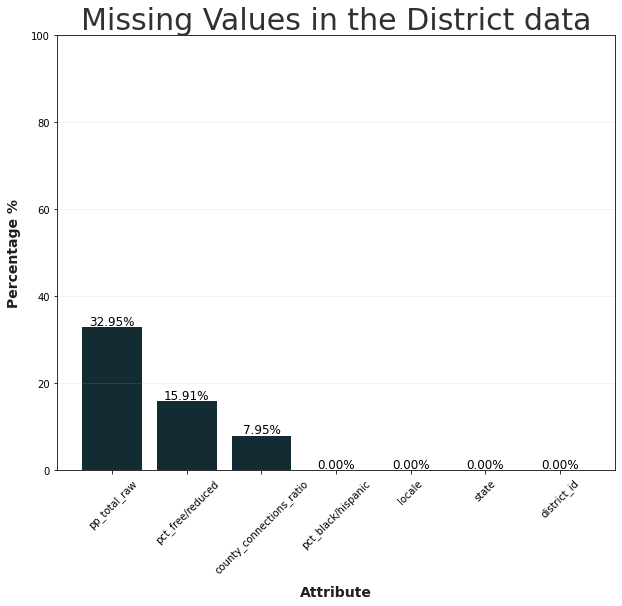

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))
null_values = (dist_df.isnull().sum() / len(dist_df) * 100).sort_values(ascending=False)
bars = ax.bar(x=null_values.index, height=null_values.values, color=colors_blue[0])

for bar in bars: 
    height = bar.get_height()
    x = bar.get_x()
    
    ax.text(
        x=x+0.4, y=height + 0.5,
        ha='center',
        s="{:.2f}%".format(height),
        fontsize=12,
        color='black',
    )

ax.set_xlabel("Attribute", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Percentage %", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.grid(axis='y', alpha=0.2)

plt.title("Missing Values in the District data",
          loc='center', fontsize=30, color=colors_dark[1])
plt.ylim(ymax=100)
plt.xticks(rotation=45)
plt.show()

In [30]:
dist_df.columns

Index(['district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'],
      dtype='object')

In [59]:
# Find rows where all data is missing
dist_df.dropna(how = 'all', subset=['state', 'locale', 'pct_black/hispanic','pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'], inplace=True)

In [61]:
dist_df.shape

(176, 7)

As some values in the district dataset are manipulated in order to anonymize the district schools, we see values such as [0.18, 1]. So for simplicity, we will take average of the two values for our analysis.

In [63]:
def colmapping(l):
    res = l.replace(', ', '-')[:-1] + ']'
    return res

In [64]:
dist_df['pct_black/hispanic'] = dist_df['pct_black/hispanic'].apply(lambda a: colmapping(a) if pd.notnull(a) else a)

In [65]:
dist_df['pct_free/reduced'] = dist_df['pct_free/reduced'].apply(lambda a: colmapping(a) if pd.notnull(a) else a)

In [66]:
dist_df['pp_total_raw'] = dist_df['pp_total_raw'].apply(lambda a: colmapping(a) if pd.notnull(a) else a)

In [69]:
dist_df['county_connections_ratio'] = dist_df['county_connections_ratio'].apply(lambda a: colmapping(a) if pd.notnull(a) else a)

In [70]:
dist_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,[0-0.2],[0-0.2],[0.18-1],[14000-16000]
2,4921,Utah,Suburb,[0-0.2],[0.2-0.4],[0.18-1],[6000-8000]
5,5987,Wisconsin,Suburb,[0-0.2],[0-0.2],[0.18-1],[10000-12000]
6,3710,Utah,Suburb,[0-0.2],[0.4-0.6],[0.18-1],[6000-8000]
7,7177,North Carolina,Suburb,[0.2-0.4],[0.2-0.4],[0.18-1],[8000-10000]


In [71]:
def average_val(l):
    res = l[1:-1]
    nums = [float(x) for x in res.split('-')]
    avg = np.round(np.mean(nums), 2)
    return avg

dist_df['pct_black/hispanic'] = dist_df['pct_black/hispanic'].apply(lambda a: average_val(a) if pd.notnull(a) else a)

dist_df['pct_free/reduced'] = dist_df['pct_free/reduced'].apply(lambda a: average_val(a) if pd.notnull(a) else a)

dist_df['county_connections_ratio'] = dist_df['county_connections_ratio'].apply(lambda a: average_val(a) if pd.notnull(a) else a)

dist_df['pp_total_raw'] = dist_df['pp_total_raw'].apply(lambda a: average_val(a) if pd.notnull(a) else a)

dist_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,0.59,15000.0
2,4921,Utah,Suburb,0.1,0.3,0.59,7000.0
5,5987,Wisconsin,Suburb,0.1,0.1,0.59,11000.0
6,3710,Utah,Suburb,0.1,0.5,0.59,7000.0
7,7177,North Carolina,Suburb,0.3,0.3,0.59,9000.0


## Feature Engineering

### Product Data

The sector column of the product dataset contains sectors compressed in a row seperated by a ';'. We would like to know the occurence of each individual sector.


*Observation*:
The pre-kindergarten sector dominates with around 95 products in that area followed by Higher-education sector products (50) and finally the corporate sector which is around 30.

In [74]:
pd_df.head()

,LP ID,url,name,provider,sector,function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [81]:
# Sector Exploration

pd_df['sector'] = pd_df['sector'].astype('str')

pd_df['sector'].value_counts()

pd_df['prek'] = pd_df['sector'].apply(lambda x: 1 if 'prek-12' in x.lower() else 0)

pd_df['high-ed'] = pd_df['sector'].apply(lambda x: 1 if 'higher ed' in x.lower() else 0)

pd_df['corp'] = pd_df['sector'].apply(lambda x: 1 if 'corporate' in x.lower() else 0)

pd_df.head(5)

,LP ID,url,name,provider,sector,func_main,func_sub,prek,high-ed,corp
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms,1,0,0
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms,1,0,0
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference",1,0,0
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms,1,1,0
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms,1,0,0


In [82]:
sector_df = pd_df[['prek', 'high-ed', 'corp']].mean()
sec_x = ['PreK', 'Higer Ed', 'Corporate']
sec_y = sector_df.values*100

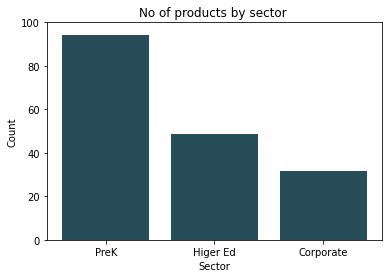

In [85]:
plt.bar(sec_x, sec_y, color=colors_blue[1])
plt.xlabel("Sector")
plt.ylabel("Count")
plt.title("No of products by sector ")
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,100))
plt.show()

In [78]:
## Splitting the product function into main and subcategory

pd_df['func_main'] = pd_df['function'].apply(lambda a: a.split(' - ')[0] if pd.notnull(a) else a)
pd_df['func_sub'] = pd_df['function'].apply(lambda a: a.split(' - ')[1] if pd.notnull(a) else a)

In [80]:
pd_df.drop('function', axis=1, inplace=True)
pd_df.head()

,LP ID,url,name,provider,sector,func_main,func_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms


## Engagement Data

Not all districts have data of 366 days recorded. Therefore when we will compare different district's results we will not get the complete picture from the data. Hence we will remove the data having no of days less than 366. Upon analysis we have 61 such districts.

In [88]:
e_all.shape

,time,lp_id,pct_access,engagement_index,id,year,month,day,cw,weekday
0,2020-01-01,93690.0,0.00,NaN,1000,2020,01,01,1,2
1,2020-01-01,17941.0,0.03,0.90,1000,2020,01,01,1,2
2,2020-01-01,65358.0,0.03,1.20,1000,2020,01,01,1,2
3,2020-01-01,98265.0,0.57,37.79,1000,2020,01,01,1,2
4,2020-01-01,59257.0,0.00,NaN,1000,2020,01,01,1,2


In [93]:
e_dist = e_all.groupby('id')

In [104]:
e_dist.time.nunique().value_counts()

366    172
355      3
353      2
317      2
359      2
338      2
356      2
362      2
330      2
336      2
273      2
213      2
329      1
333      1
328      1
325      1
253      1
312      1
315      1
311      1
52       1
44       1
292      1
33       1
284      1
282      1
280      1
337      1
95       1
346      1
126      1
207      1
308      1
186      1
149      1
147      1
141      1
140      1
136      1
365      1
348      1
363      1
360      1
358      1
357      1
99       1
352      1
234      1
350      1
15       1
Name: time, dtype: int64

In [120]:
e_data = pd.DataFrame()

e_files = []
for dirname, _, filenames in os.walk('engagement_data/'):
    for filename in filenames:
        e_files.append([os.path.join(dirname, filename),filename[0:4]])

for file in e_files:
    e_df = pd.read_csv(file[0])
    e_df['id'] = file[1]
    if len(e_df.groupby('time')) == 366:
        e_data = e_data.append(e_df)

In [198]:
e_data['time'] = pd.to_datetime(e_data['time'], dayfirst = True)

0       2020-01-01
1       2020-01-01
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
98445   2020-12-31
98446   2020-12-31
98447   2020-12-31
98448   2020-12-31
98449   2020-12-31
Name: time, Length: 18612528, dtype: datetime64[ns]

In [203]:
merge_df['time'] = pd.to_datetime(merge_df['time'], dayfirst = True)

In [201]:
# Forming new variables week and weekday

e_data['cw'] = pd.DatetimeIndex(e_data['time']).week
e_data['weekday'] = pd.DatetimeIndex(e_data['time']).weekday

In [121]:
e_data.shape

(18612528, 5)

In [123]:
e_data.head()

,time,lp_id,pct_access,engagement_index,id
0,2020-01-01,93690.0,0.00,NaN,1000
1,2020-01-01,17941.0,0.03,0.90,1000
2,2020-01-01,65358.0,0.03,1.20,1000
3,2020-01-01,98265.0,0.57,37.79,1000
4,2020-01-01,59257.0,0.00,NaN,1000


## Combine the data

In [126]:
# Combine all the 3 datasets

merge_df = e_data.copy()
merge_df['id'] = merge_df['id'].astype('int64')
merge_df = merge_df.merge(pd_df, left_on='lp_id', right_on='LP ID', how='left')

In [140]:
merge_df = merge_df.merge(dist_df, left_on='id', right_on='district_id', how='left')

In [141]:
merge_df.head()

,time,lp_id,pct_access,engagement_index,id,LP ID,url,name,provider,sector,...,prek,high-ed,corp,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-01,93690.0,0.00,NaN,1000,93690.0,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,...,1.0,1.0,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN
1,2020-01-01,17941.0,0.03,0.90,1000,17941.0,https://www.kidsa-z.com/main/Login,Kids A-Z,Lazel Inc.,PreK-12,...,1.0,0.0,0.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN
2,2020-01-01,65358.0,0.03,1.20,1000,65358.0,http://www.prezi.com,Prezi,Prezi Inc.,PreK-12; Higher Ed; Corporate,...,1.0,1.0,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN
3,2020-01-01,98265.0,0.57,37.79,1000,98265.0,http://quizlet.com/,Quizlet,Quizlet,PreK-12,...,1.0,0.0,0.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN
4,2020-01-01,59257.0,0.00,NaN,1000,59257.0,http://www.issuu.com,Issuu,Issuu,PreK-12; Higher Ed; Corporate,...,1.0,1.0,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN


In [142]:
merge_df.drop(['id', 'LP ID'], axis=1, inplace=True)

In [146]:
merge_df.columns

Index(['time', 'lp_id', 'pct_access', 'engagement_index', 'url', 'name',
       'provider', 'sector', 'func_main', 'func_sub', 'prek', 'high-ed',
       'corp', 'district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'],
      dtype='object')

In [167]:
# Forming new variables week and weekday

merge_df['cw'] = pd.DatetimeIndex(merge_df['time']).week
merge_df['weekday'] = pd.DatetimeIndex(merge_df['time']).weekday

In [169]:
## Keep only weekdays in the analysis
merge_df = merge_df[merge_df.weekday <= 5]

## Data Exploration

### Product Dataset

### Let's see which companies' products are people using the most


From the visualization below it is clear that Google LLC dominates with 30 products. Other than google, there are no product that have 10 products in this datasets with the next 4 being Microsoft, Houghton Mifflin Harcourt, IXL Learning and Learning A-Z.

Text(0.5, 1.0, 'Top 5 Company providing most products')

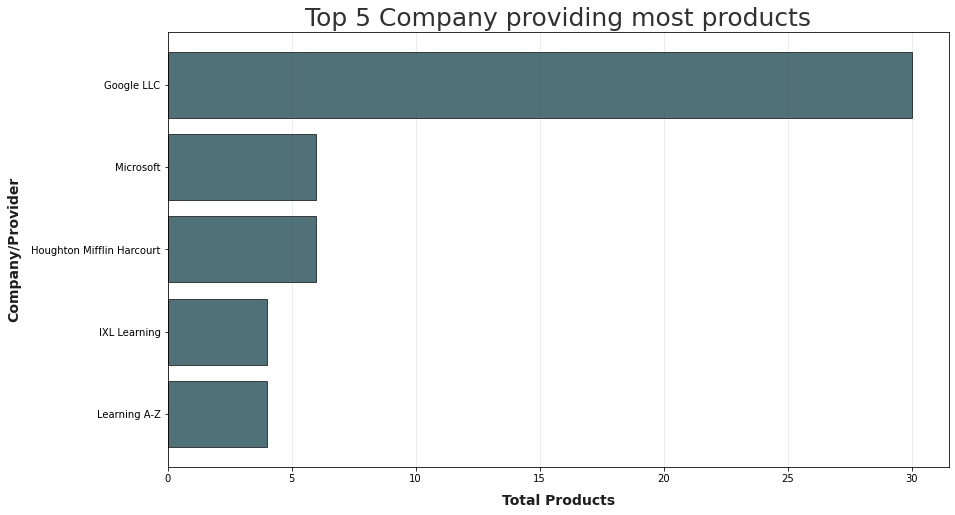

In [143]:
fig, ax = plt.subplots(figsize=(14, 8))
df = pd_df.groupby('provider').count()[['LP ID']].sort_values(by="LP ID", ascending=True)[-5:]
bars = ax.barh(df.index, df['LP ID'], color=colors_blue[1], alpha=0.8, edgecolor=colors_dark[0])

ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Total Products (millions)", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Company/Provider", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.title("Top 5 Company providing most products", loc='center', fontsize=25, color=colors_dark[1]) 

### What are people mainly using the LearnPlatform products for?

The answer lies in the following bar graph below. People are using the LC - Learning Classroom products the most. The other types of product is CM i.e Classroom management and SDO(School & District Operations). But did COVID-19 influenced this numbers? We will analyze this further in the Analyze section.

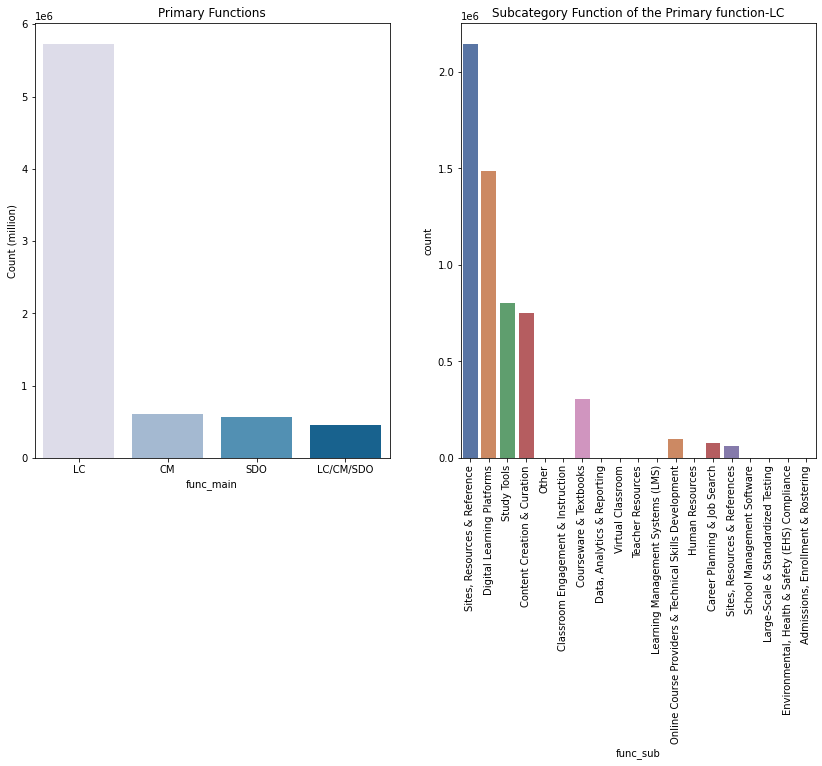

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(14,8))
sns.countplot(data=merge_df, x='func_main', palette ='PuBu', ax=ax[0], order=merge_df['func_main'].value_counts().index)
ax[0].set_title('Primary Functions')
ax[0].set_ylabel('Count (million)')

sns.countplot(data=merge_df[merge_df.func_main == 'LC'], x='func_sub', palette ='deep', ax=ax[1], order=merge_df['func_sub'].value_counts().index)
ax[1].set_title('Subcategory Function of the Primary function-LC')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_label('Count (million)')
plt.show()

In [181]:
vc_list = pd_df[pd_df['func_sub'] == 'Virtual Classroom']['name'].tolist()

In [194]:
merge_df[merge_df.name.isin(vc_list)]

,time,lp_id,pct_access,engagement_index,url,name,provider,sector,func_main,func_sub,...,corp,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,cw,weekday
163,2020-01-02,61945.0,0.00,NaN,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,...,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,1,3
669,2020-01-03,61945.0,0.00,NaN,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,...,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,1,4
768,2020-01-03,32050.0,0.00,NaN,https://www.webex.com/,WebEx,Cisco,PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,...,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,1,4
1167,2020-01-06,61945.0,0.00,NaN,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,...,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,2,0
2351,2020-01-09,61945.0,0.00,NaN,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,...,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18612363,2020-12-30,61945.0,0.43,28.19,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,...,1.0,9927.0,Massachusetts,Suburb,0.1,NaN,NaN,17000.0,53,2
18612399,2020-12-31,61945.0,0.18,9.26,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,...,1.0,9927.0,Massachusetts,Suburb,0.1,NaN,NaN,17000.0,53,3
18612418,2020-12-31,99580.0,0.00,NaN,https://loom.com/,"Loom - Video Recorder: Screen, Webcam and Mic","Loom, Inc",PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,...,1.0,9927.0,Massachusetts,Suburb,0.1,NaN,NaN,17000.0,53,3
18612486,2020-12-31,98845.0,0.06,2.37,https://meet.google.com/_meet,Meet,Google LLC,PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,...,1.0,9927.0,Massachusetts,Suburb,0.1,NaN,NaN,17000.0,53,3


## Virtual Product Popularity

When we remove the weekends from the year 2020 we get the graph below depicting the percentage of students accessesing products per day.

From the graph we can clearly see that after the WHO declared the pandemic the use of video calling and meeting apps increased to a very high level. We can see that the use gradually decreased due to the summer holidays in the US.

The two most popular apps used were Google meet and Zoom.

Before the summer holiday almost 10% of the people were accessing Google Meet while roughly 7.5% were using Zoom but after the summer holidays the number of the percentage of people although increases they became the same to almost 15%.

The occasional drop in the number is explained by the occassional national and school holidays.

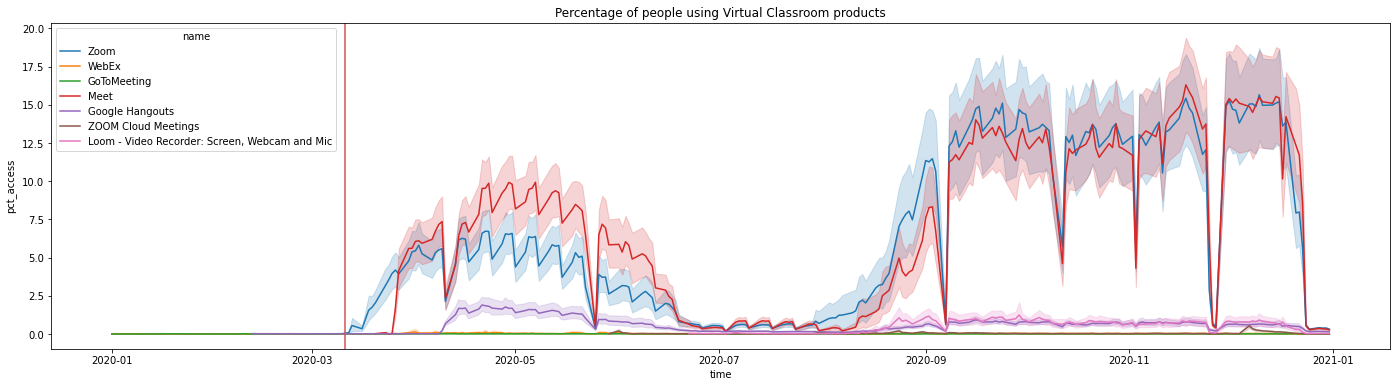

In [228]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.lineplot( x='time', y='pct_access', hue='name',  data=merge_df[merge_df.name.isin(vc_list)], legend=True)
who_line = plt.axvline(x = pd.Timestamp('2020-03-11'), color=colors_red[3], label="WHO declares COVID-19 as a pandemic")
plt.title('Percentage of people using Virtual Classroom products')
plt.show()

## District

Before carrying out further let's look at what is the local areas distribution in the dataset.

We see that almost 60% of the population resides in the suburbs area. That means according to the nces data, these people are urbanized and live outside the principal city. The next most population are rural(19%) and city(16%). This gives us a backdrop of where our population uses the online products and services from.

Text(0.5, 1.0, 'Local areas (%) in the dataset')

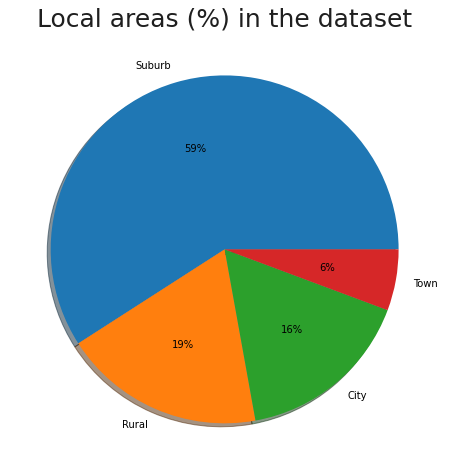

In [205]:
fig, ax = plt.subplots(figsize=(14, 8))
ind = dist_df['locale'].value_counts().index
y = dist_df['locale'].value_counts().values

ax.pie(y, explode=None, labels=ind, colors=None, autopct='%1.0f%%', shadow=True)

plt.title("Local areas (%) in the dataset", loc='center', fontsize=25, color=colors_dark[0])

https://nces.ed.gov/programs/edge/Geographic/LocaleBoundaries#:~:text=A%20locale%20classification%20is%20a,or%20proximity%20to%20populated%20areas.

Next we look at the percentage brackets of population in our dataset who identify themselves as 'black/hispanic' and those who avail a free or reduced lunch for education purposes.

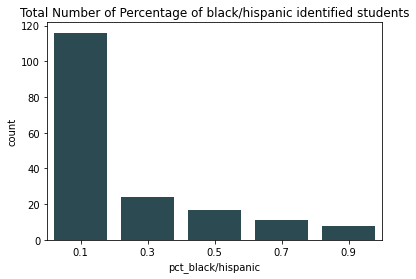

In [206]:
sns.countplot(data=dist_df, x='pct_black/hispanic', color=colors_blue[1])
plt.title("Total Number of Percentage of black/hispanic identified students")
plt.show()
# ax = (dist_df['pct_black/hispanic'].value_counts(normalize=True, sort=True)*100)
# ax.plot.bar()

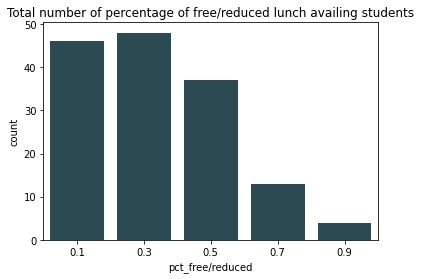

In [207]:
sns.countplot(data=dist_df, x='pct_free/reduced', color=colors_blue[1])
plt.title("Total number of percentage of free/reduced lunch availing students")
plt.show()

## Analyze

In [208]:
merge_df.head()

,time,lp_id,pct_access,engagement_index,url,name,provider,sector,func_main,func_sub,...,corp,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,cw,weekday
0,2020-01-01,93690.0,0.00,NaN,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,LC,"Sites, Resources & Reference",...,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,1,2
1,2020-01-01,17941.0,0.03,0.90,https://www.kidsa-z.com/main/Login,Kids A-Z,Lazel Inc.,PreK-12,LC,Digital Learning Platforms,...,0.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,1,2
2,2020-01-01,65358.0,0.03,1.20,http://www.prezi.com,Prezi,Prezi Inc.,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,...,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,1,2
3,2020-01-01,98265.0,0.57,37.79,http://quizlet.com/,Quizlet,Quizlet,PreK-12,LC,Study Tools,...,0.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,1,2
4,2020-01-01,59257.0,0.00,NaN,http://www.issuu.com,Issuu,Issuu,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,...,1.0,1000.0,Connecticut,Suburb,0.7,0.3,0.59,NaN,1,2


In [209]:
merge_df.columns

Index(['time', 'lp_id', 'pct_access', 'engagement_index', 'url', 'name',
       'provider', 'sector', 'func_main', 'func_sub', 'prek', 'high-ed',
       'corp', 'district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw', 'cw',
       'weekday'],
      dtype='object')

## Trend of Engagement index

### The increasing popularity of online products

As we can see from the visualization below, the page loads of online products did rise after the WHO declared the pandemic in the US.
As a reminder page-load events is calculated per one thousand students of a given product and on a given day. We can see students learning activitis in one day by combining all the pagae-load in a day.
More and more students were using products such as Google Classroom, Google Docs etc for their supplementary school work.


But why there's a dip from June to September 2020 in the page loads. This happens because it is on summer holiday period.


In [210]:
df_avg = merge_df.groupby('time').mean().reset_index()[['time', 'pct_access', 'engagement_index']]
rolling_20 = df_avg[['engagement_index', 'pct_access']].rolling(window=20).mean()

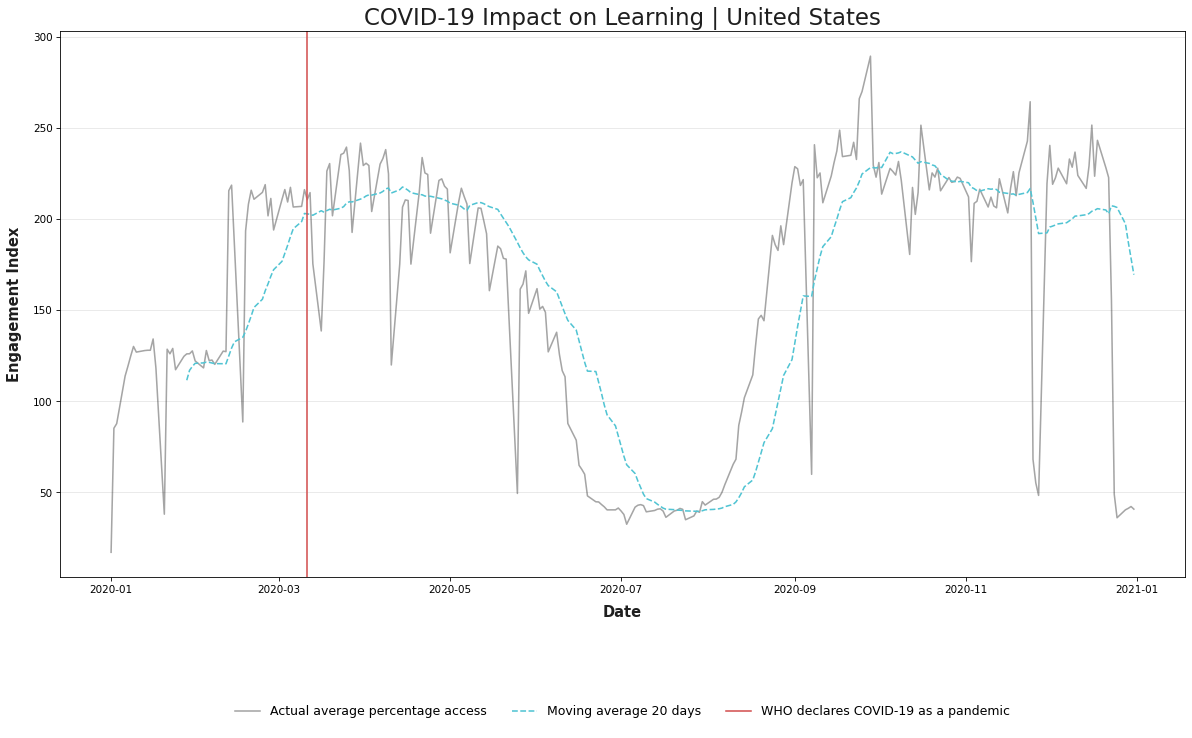

In [212]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=75)

line0 = ax.plot(df_avg['time'], df_avg['engagement_index'], color=colors_dark[0], alpha=0.4, label="Actual average percentage access")
line1 = ax.plot(df_avg['time'], rolling_20['engagement_index'], color=colors_blue[3], alpha=1, label="Moving average 20 days", linestyle='--')
who_line = plt.axvline(x = pd.Timestamp('2020-03-11'), color=colors_red[3], label="WHO declares COVID-19 as a pandemic")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Date", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Engagement Index", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)

plt.title("COVID-19 Impact on Learning | United States", ha='center', fontsize=22, color=colors_dark[0])

plt.tight_layout()
plt.show()

## Summer Holidays

## Geographic

Here we try to analyze the relationship between state and the page load events. That means we are aggregating page loads for a given state in 2020. Alos note that there are 23 states in the dataset.

There are 3 states that have more than 300 million of page-load in 2020, they are Connecticut, Illinois and Massachusetts. They are contributing around 40.7% of total page-load in 2020.

Also a total of 7 states are seeing more page loads than the average page loads among all the states which is around 100 million

Maybe furthermore we can see what extra steps or different strategies these states have in common that are making them so succesfull. 

In [213]:
state_df = pd.DataFrame(merge_df.groupby('state')['engagement_index'].sum()/1000000).reset_index()
state_df.columns = ['state', 'eng_index']
state_df = state_df.sort_values('eng_index', ascending=False)

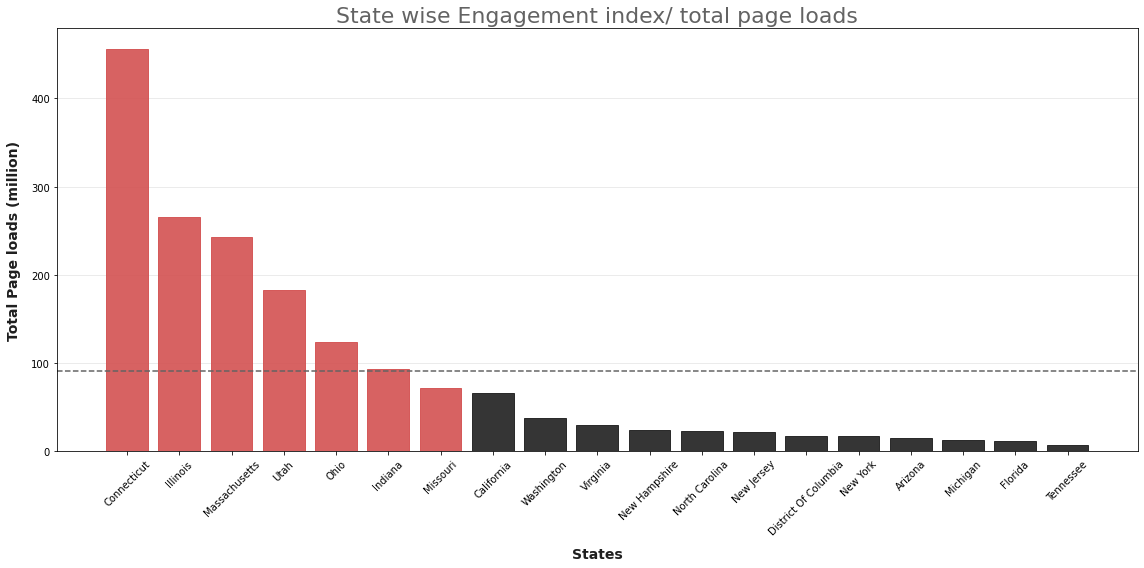

In [214]:
fig, ax = plt.subplots(figsize=(16, 8))

mean_score = state_df.eng_index.mean()

bars1 = ax.bar(state_df.state, state_df.eng_index, color=colors_dark[0], alpha=0.9, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2], label="Average page load across the US")

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("States", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Total Page loads (million)", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

bars1[0].set_color(colors_red[3])
bars1[1].set_color(colors_red[3])
bars1[2].set_color(colors_red[3])
bars1[3].set_color(colors_red[3])
bars1[4].set_color(colors_red[3])
bars1[5].set_color(colors_red[3])
bars1[6].set_color(colors_red[3])

plt.title("State wise Engagement index/ total page loads", loc='center', fontsize=22, color=colors_dark[2]) 

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Race/Ethnicity

Black/Hispanic is a percentage of students in the school districts that are identified as Black or Hispanic based on 2018-19 NCES data.

Observations:

Most school districts have 0%-20% of black/hispanic.
In a point of view black/hispanic, higher number of school districts resulting into a higher number page-load.

In [215]:
race_df = pd.DataFrame(merge_df.groupby('pct_black/hispanic')['engagement_index'].sum()/1000000).reset_index()
race_df.columns = ['race', 'eng_index']
race_df = race_df.sort_values('eng_index', ascending=False)

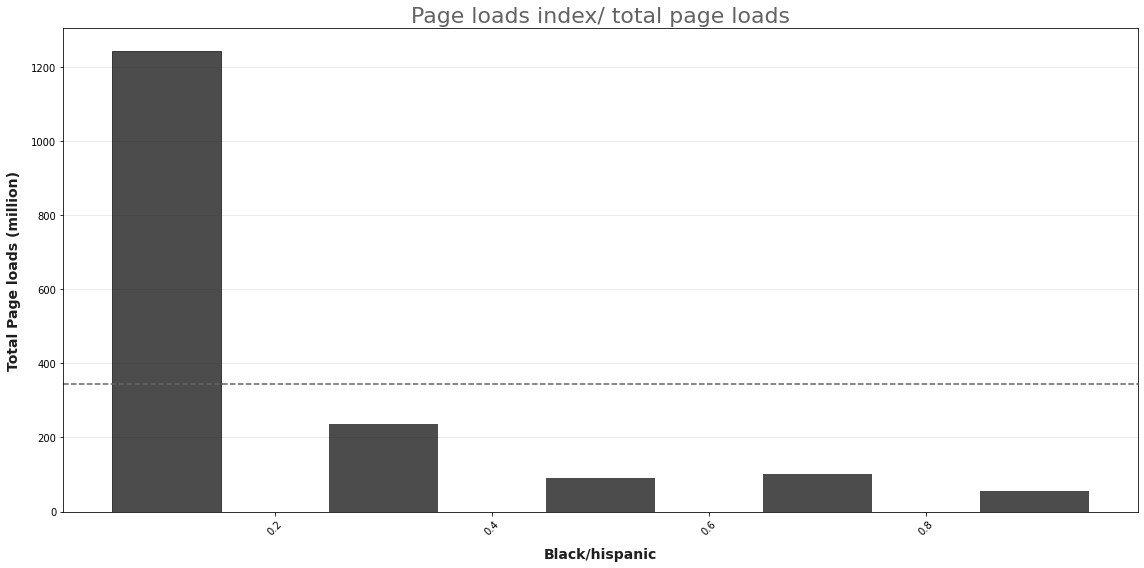

In [220]:
fig, ax = plt.subplots(figsize=(16, 8))

mean_score = race_df.eng_index.mean()

bars1 = ax.bar(race_df.race, race_df.eng_index, color=colors_dark[0], alpha=0.8, width = 0.1)
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2], label="Average page load across the US")

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Black/hispanic", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Total Page loads (million)", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

bars1[0].set_edgecolor(colors_dark[0])

plt.title("Page loads index/ total page loads", loc='center', fontsize=22, color=colors_dark[2]) 
        
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

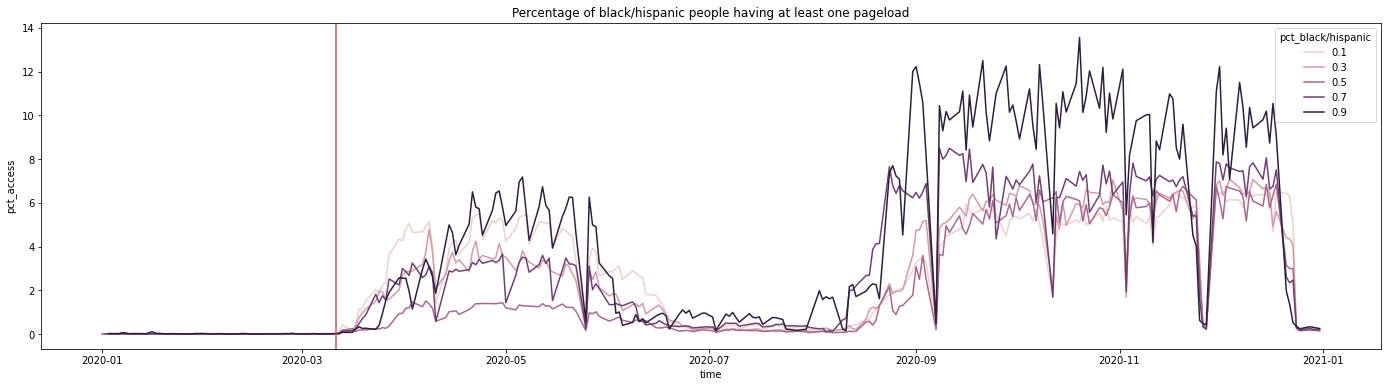

In [229]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.lineplot( x='time', y='pct_access', hue='pct_black/hispanic',  data=merge_df[merge_df.name.isin(vc_list)], legend=True, ci=None)
who_line = plt.axvline(x = pd.Timestamp('2020-03-11'), color=colors_red[3], label="WHO declares COVID-19 as a pandemic")
plt.title('Percentage of black/hispanic people having at least one pageload in percentage')
plt.show()

## County Connections ratio: 

Since this column only contains a single averag value this column might be dropped from our analysis safely

In [224]:
## County connections ratio

merge_df['county_connections_ratio'].value_counts()

0.59    11149607
Name: county_connections_ratio, dtype: int64

### Percentage of people availing free or reduced prices of food in educational institutes



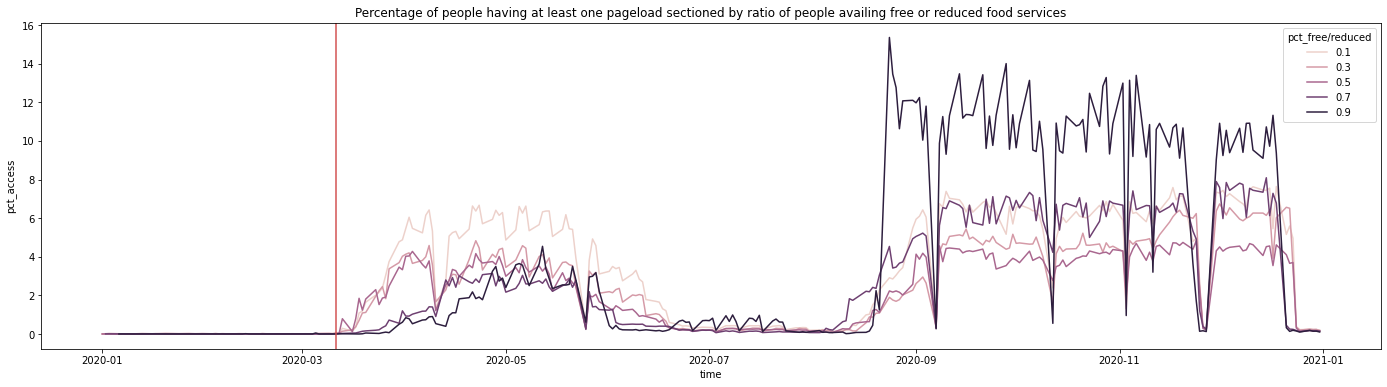

In [233]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.lineplot( x='time', y='pct_access', hue='pct_free/reduced',  data=merge_df[merge_df.name.isin(vc_list)], legend=True, ci=None)
who_line = plt.axvline(x = pd.Timestamp('2020-03-11'), color=colors_red[3], label="WHO declares COVID-19 as a pandemic")
plt.title('Percentage of people having at least one pageload sectioned by ratio of people availing free or reduced food services')
plt.show()